## Purchase Type x Response (Yes, No) dan x Complain (Yes, No)

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [123]:
df = pd.read_csv("marketing_campaign.csv", sep=";")

In [124]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [125]:
# Deals
Q1 = df["NumDealsPurchases"].quantile(.25)
Q3 = df["NumDealsPurchases"].quantile(.75)

def Deals(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Deals"] = df["NumDealsPurchases"].fillna("None")
df["Deals"] = df["Deals"].apply(lambda x: Deals(x))

# Website
Q1 = df["NumWebPurchases"].quantile(.25)
Q3 = df["NumWebPurchases"].quantile(.75)

def Website(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Website"] = df["NumWebPurchases"].fillna("None")
df["Website"] = df["Website"].apply(lambda x: Website(x))

#Catalog
Q1 = df["NumCatalogPurchases"].quantile(.25)
Q3 = df["NumCatalogPurchases"].quantile(.75)

def Catalog(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Catalog"] = df["NumCatalogPurchases"].fillna("None")
df["Catalog"] = df["Catalog"].apply(lambda x: Catalog(x))


# Store
Q1 = df["NumStorePurchases"].quantile(.25)
Q3 = df["NumStorePurchases"].quantile(.75)

def Store(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Store"] = df["NumStorePurchases"].fillna("None")
df["Store"] = df["Store"].apply(lambda x: Store(x))


### Purchase Type vs Response

In [126]:
# group data by Purchase Type & Response
dfg1 = df.groupby(["Response", "Deals","Website","Catalog","Store"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nISCustomer"}, inplace=True)

# group data by Purchase Type
dfg2 = df.groupby(["Deals","Website","Catalog","Store"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nCustomer"}, inplace=True)

# merge data
df_purchase_type = dfg1.merge(dfg2, on=["Deals","Website","Catalog","Store"])

# calculate ratio
df_purchase_type["ratio"] = (df_purchase_type["nISCustomer"]/df_purchase_type["nCustomer"])*100

# set for label
df_purchase_type["Response"] = df_purchase_type["Response"].apply(lambda x: "Yes" if x == 1 else "No")

df_purchase_type

,Response,Deals,Website,Catalog,Store,nISCustomer,nCustomer,ratio
0,No,High,High,High,High,49,58,84.482759
1,Yes,High,High,High,High,9,58,15.517241
2,No,High,High,High,Medium,27,39,69.230769
3,Yes,High,High,High,Medium,12,39,30.769231
4,No,High,High,Medium,High,68,71,95.774648
5,Yes,High,High,Medium,High,3,71,4.225352
6,No,High,High,Medium,Medium,101,124,81.451613
7,Yes,High,High,Medium,Medium,23,124,18.548387
8,No,High,Low,High,Low,3,3,100.000000
9,No,High,Low,High,Medium,1,1,100.000000


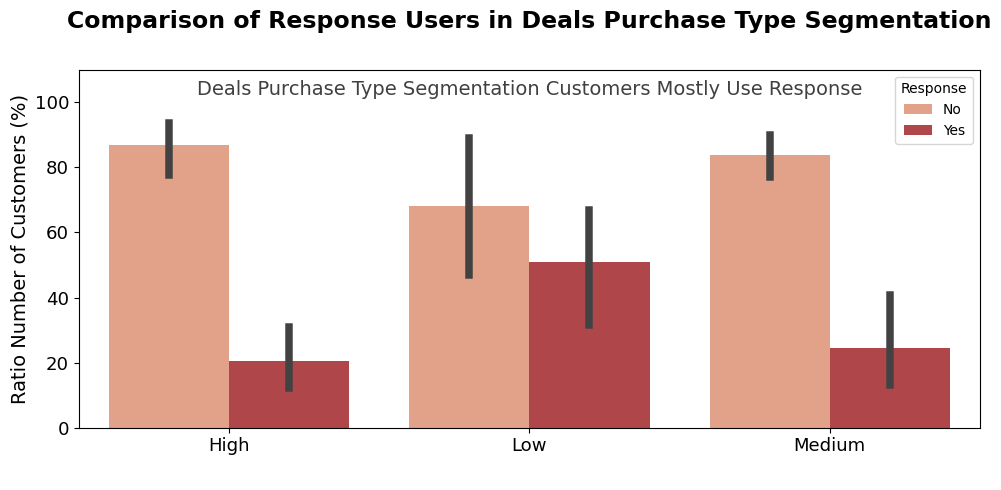

In [127]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Deals", y="ratio",
                 data=df_purchase_type, hue="Response",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_purchase_type[df_purchase_type["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Deals Purchase Type Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Deals Purchase Type Segmentation Customers Mostly Use Response"
ax.text((x_start + x_end) / 2, y_end * 1.04, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

Segmentasi customer yang merespon campaign berdasarkan tipe pembelian jenis diskon, paling banyak berada pada kategori rendah (low). Sehingga untuk campaign marketing selanjutnya, perusahaan sebaiknya fokus pada kategori pembelian yang sedikit namun merespon campaign dengan baik

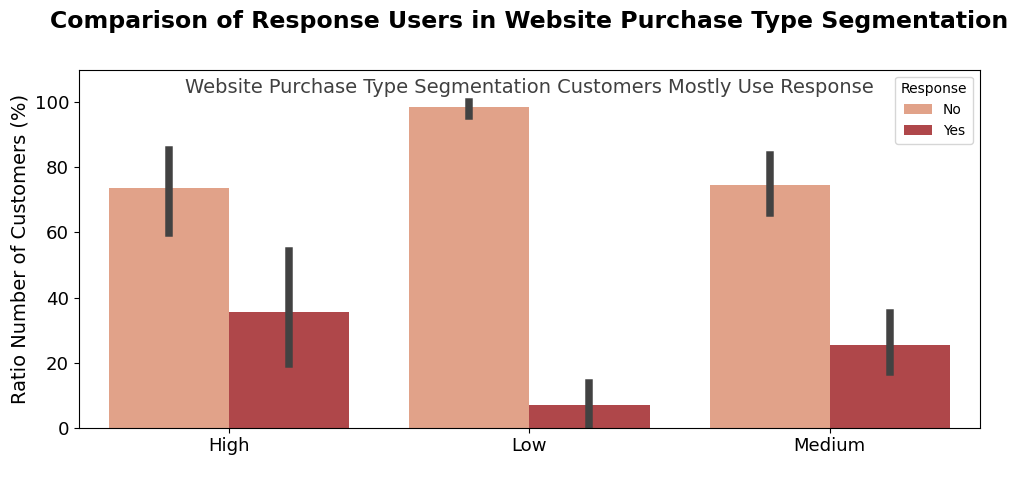

In [128]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Website", y="ratio",
                 data=df_purchase_type, hue="Response",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_purchase_type[df_purchase_type["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Website Purchase Type Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Website Purchase Type Segmentation Customers Mostly Use Response"
ax.text((x_start + x_end) / 2, y_end * 0.98, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

Segmentasi customer yang merespon campaign berdasarkan tipe pembelian melalui website, paling banyak berada pada kategori tinggi (high). Sehingga untuk campaign marketing selanjutnya, perusahaan sebaiknya fokus pada kategori pembelian yang banyak dan merespon campaign dengan baik

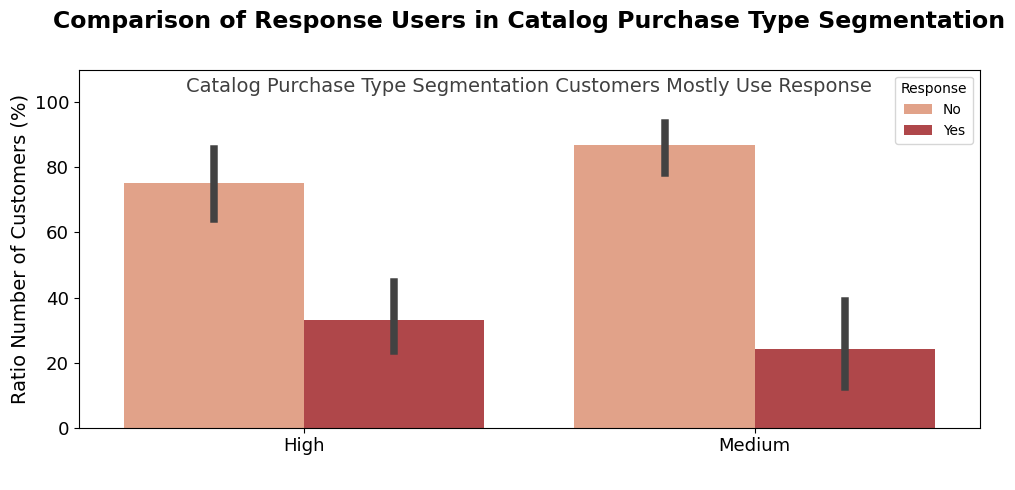

In [129]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Catalog", y="ratio",
                 data=df_purchase_type, hue="Response",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_purchase_type[df_purchase_type["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Catalog Purchase Type Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Catalog Purchase Type Segmentation Customers Mostly Use Response"
ax.text((x_start + x_end) / 2, y_end * 1.05, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

Segmentasi customer yang merespon campaign berdasarkan tipe pembelian melalui catalog, paling banyak berada pada kategori tinggi (high). Sehingga untuk campaign marketing selanjutnya, perusahaan sebaiknya fokus pada kategori pembelian yang banyak dan merespon campaign dengan baik

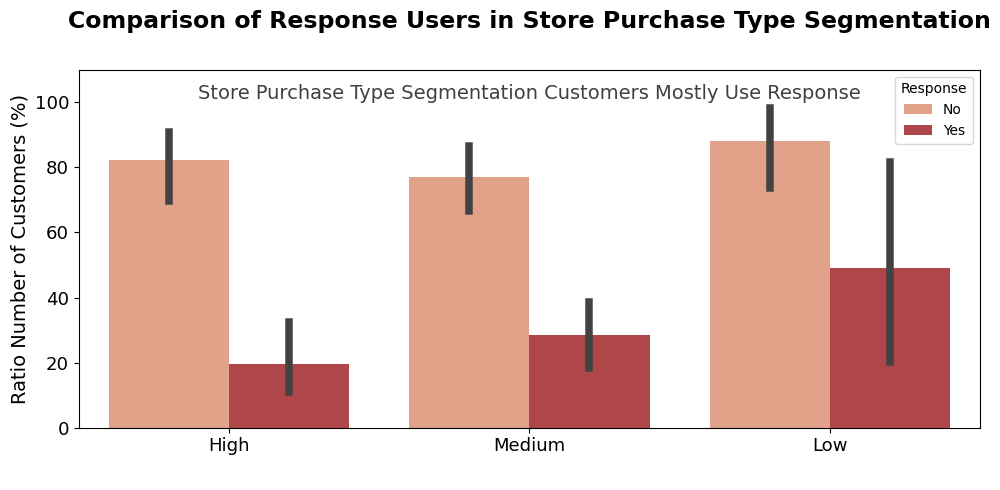

In [130]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Store", y="ratio",
                 data=df_purchase_type, hue="Response",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_purchase_type[df_purchase_type["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Store Purchase Type Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Store Purchase Type Segmentation Customers Mostly Use Response"
ax.text((x_start + x_end) / 2, y_end * 0.98, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

Segmentasi customer yang merespon campaign berdasarkan tipe pembelian secara langsung melalui store, paling banyak berada pada kategori rendah (low). Sehingga untuk campaign marketing selanjutnya, perusahaan sebaiknya fokus pada kategori pembelian yang sedikit namun merespon campaign dengan baik

### Purchase Type & Response & Complain

In [146]:
# group data by Purchase Type & Response & Complain
dfg1 = df.groupby(["Response", "Complain", "Deals","Website","Catalog","Store"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nISCustomer"}, inplace=True)

# group data by Purchase Type
dfg2 = df.groupby(["Deals","Website","Catalog","Store"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nCustomer"}, inplace=True)

# merge data
df_purchase_type = dfg1.merge(dfg2, on=["Deals","Website","Catalog","Store"])

# calculate ratio
df_purchase_type["ratio"] = (df_purchase_type["nISCustomer"]/df_purchase_type["nCustomer"])*100

# set for label
df_purchase_type["Complain"] = df_purchase_type["Complain"].apply(lambda x: "Yes" if x == 1 else "No")

df_purchase_type

,Response,Complain,Deals,Website,Catalog,Store,nISCustomer,nCustomer,ratio
0,0,No,High,High,High,High,48,58,82.758621
1,0,Yes,High,High,High,High,1,58,1.724138
2,1,No,High,High,High,High,9,58,15.517241
3,0,No,High,High,High,Medium,27,39,69.230769
4,1,No,High,High,High,Medium,12,39,30.769231
...,...,...,...,...,...,...,...,...,...
68,1,Yes,Medium,Medium,Medium,Low,1,45,2.222222
69,0,No,Medium,Medium,Medium,Medium,338,362,93.370166
70,0,Yes,Medium,Medium,Medium,Medium,3,362,0.828729
71,1,No,Medium,Medium,Medium,Medium,21,362,5.801105


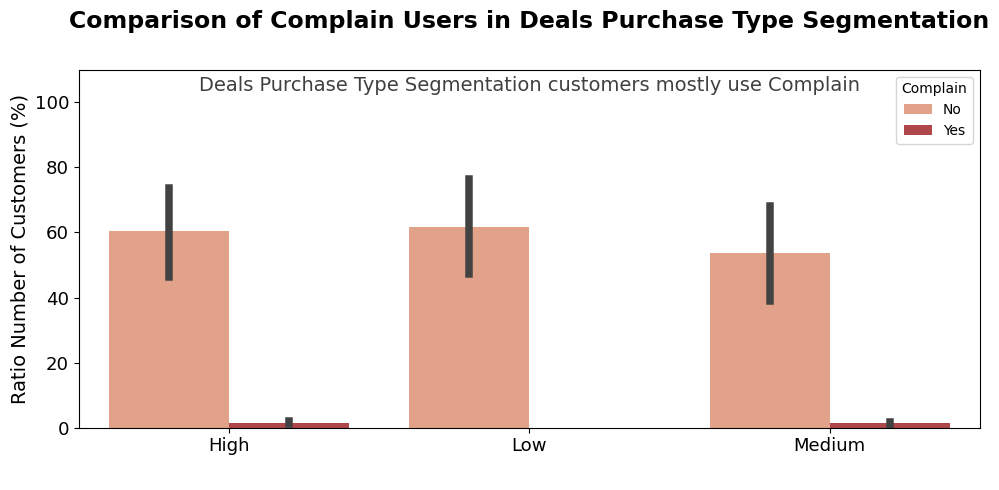

In [147]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Deals", y="ratio",
                 data=df_purchase_type, hue="Complain",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_purchase_type[df_purchase_type["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Complain Users in Deals Purchase Type Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Deals Purchase Type Segmentation customers mostly use Complain"
ax.text((x_start + x_end) / 2, y_end * 1.29, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

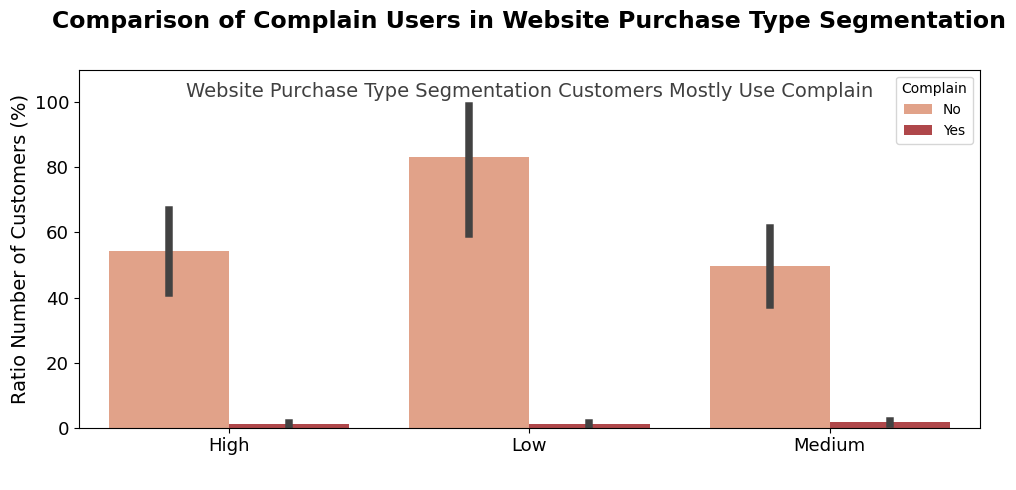

In [148]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Website", y="ratio",
                 data=df_purchase_type, hue="Complain",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_purchase_type[df_purchase_type["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Complain Users in Website Purchase Type Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Website Purchase Type Segmentation Customers Mostly Use Complain"
ax.text((x_start + x_end) / 2, y_end * 0.98, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

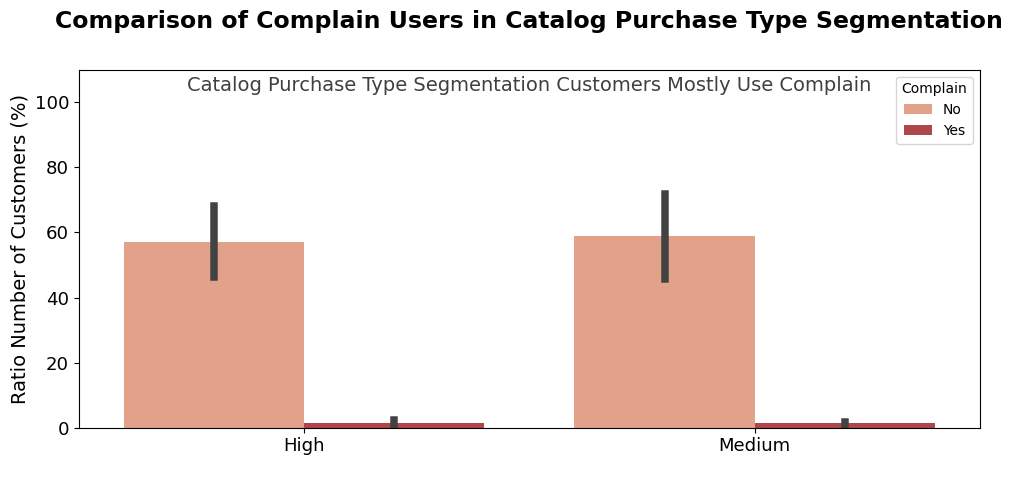

In [149]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Catalog", y="ratio",
                 data=df_purchase_type, hue="Complain",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_purchase_type[df_purchase_type["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Complain Users in Catalog Purchase Type Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Catalog Purchase Type Segmentation Customers Mostly Use Complain"
ax.text((x_start + x_end) / 2, y_end * 1.37, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

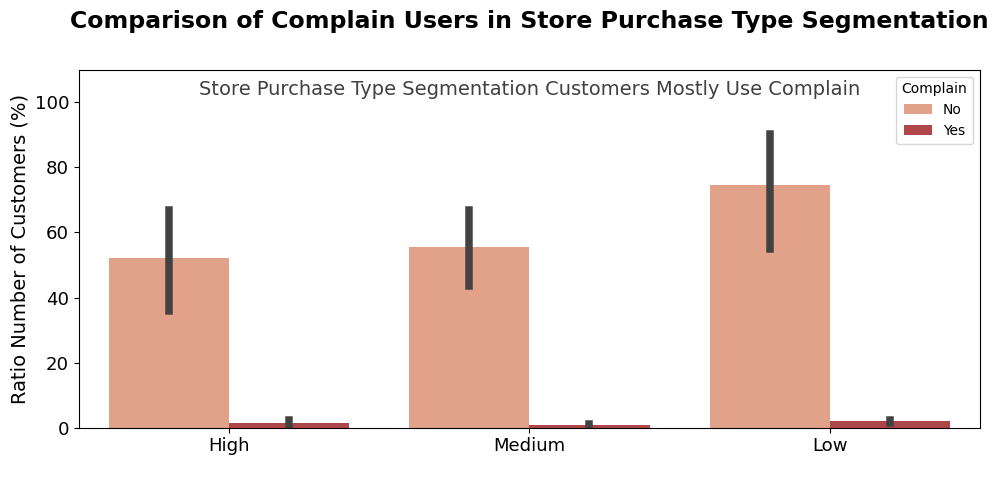

In [150]:
# plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Store", y="ratio",
                 data=df_purchase_type, hue="Complain",
                 palette=list(sns.color_palette("RdBu"))[::-1][-2:])

# set values label annotation
for p in ax.patches:
    ratio_height = p.get_height()
    ncus = df_purchase_type[df_purchase_type["ratio"] == ratio_height]["nISCustomer"].values
    if len(ncus) > 0:
        ncus = ncus[0]
        ax.annotate(
            f'{ncus} Customers',
            (p.get_x() + p.get_width() / 2., ratio_height),
            ha='center',
            va='center',
            xytext=(0, 10),
            fontsize=10,
            textcoords='offset points')

# set title
plt.ylabel('Ratio Number of Customers (%)', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Complain Users in Store Purchase Type Segmentation",
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "Store Purchase Type Segmentation Customers Mostly Use Complain"
ax.text((x_start + x_end) / 2, y_end * 1.08, desc,
        ha='center', fontsize=14, alpha=0.75)

# setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()